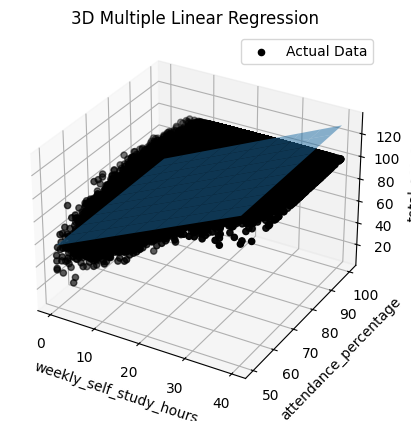

90.57306028075844


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Dataset
d=pd.read_csv("student_performance.csv")

# Drop rows with NaN values in the relevant columns for model training
d_cleaned = d.dropna(subset=["weekly_self_study_hours", "attendance_percentage", "total_score"])

x1=d_cleaned["weekly_self_study_hours"].values
x2=d_cleaned["attendance_percentage"].values
y=d_cleaned["total_score"].values

# Prepare data
X = np.column_stack((x1, x2))
Y = np.array(y)

# Model
model = LinearRegression()
model.fit(X, Y)

# Prediction line for plane
x1_range = np.linspace(min(x1), max(x1), 10)
x2_range = np.linspace(min(x2), max(x2), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = model.predict(np.column_stack((x1_grid.ravel(), x2_grid.ravel()))).reshape(x1_grid.shape)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter actual points
ax.scatter(x1, x2, y, color='black', label='Actual Data')

# Regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)

ax.set_xlabel("weekly_self_study_hours")
ax.set_ylabel("attendance_percentage") # Corrected label
ax.set_zlabel("total_score") # Corrected label
ax.set_title("3D Multiple Linear Regression")

plt.legend()
plt.show()


prediction=model.predict([[18.5,95.6]])
print(prediction[0])